# Manual Prewitt Edge Detection with OpenCV
This notebook demonstrates how to manually apply Prewitt operator to detect edges in an image using OpenCV.

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

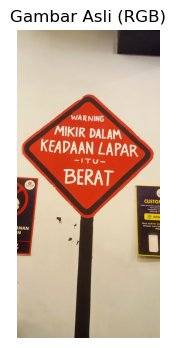

 Image:
 [[[204 190 163]
  [204 190 163]
  [202 191 163]
  ...
  [ 19  14  21]
  [ 20  15  22]
  [ 21  16  23]]

 [[203 189 162]
  [203 189 162]
  [201 190 162]
  ...
  [ 19  14  21]
  [ 20  15  22]
  [ 19  14  21]]

 [[202 188 161]
  [202 188 161]
  [201 190 162]
  ...
  [ 20  15  22]
  [ 21  16  23]
  [ 18  13  20]]

 ...

 [[154 143 115]
  [153 142 114]
  [155 144 116]
  ...
  [181 170 142]
  [182 171 143]
  [184 173 145]]

 [[155 144 114]
  [154 143 113]
  [154 143 113]
  ...
  [181 170 142]
  [182 171 143]
  [183 172 144]]

 [[156 145 115]
  [155 144 114]
  [154 143 113]
  ...
  [183 172 144]
  [182 171 143]
  [181 170 142]]]


In [24]:

img_color = cv2.imread('IMG.jpg')
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(4, 4))
plt.title("Gambar Asli (RGB)")
plt.imshow(img_color_rgb)
plt.axis('off')
plt.show()

print(" Image:\n", img_color_rgb)

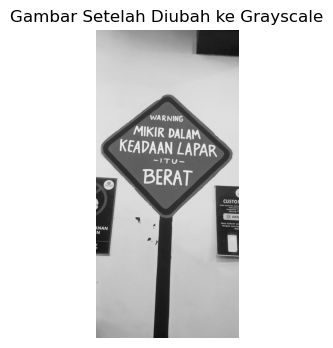

Grayscale Image:
 [[191 191 191 ...  16  17  18]
 [190 190 190 ...  16  17  16]
 [189 189 190 ...  17  18  15]
 ...
 [143 142 144 ... 170 171 173]
 [144 143 143 ... 170 171 172]
 [145 144 143 ... 172 171 170]]


In [32]:

img = cv2.imread('IMG.jpg', cv2.IMREAD_GRAYSCALE)

# # Resize
# img = cv2.resize(img, (4, 4))
plt.figure(figsize=(4, 4))
plt.title("Gambar Setelah Diubah ke Grayscale")
plt.imshow(img, cmap='gray')  # cmap='gray' penting agar warna abu-abu
plt.axis('off')
plt.show()

print("Grayscale Image:\n", img)

In [33]:

kernel_prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=np.float32)

kernel_prewitt_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
], dtype=np.float32)

In [34]:

prewitt_x = cv2.filter2D(img, cv2.CV_32F, kernel_prewitt_x)
prewitt_y = cv2.filter2D(img, cv2.CV_32F, kernel_prewitt_y)

In [35]:

magnitude = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))
magnitude = np.clip(magnitude, 0, 255)

In [36]:

np.set_printoptions(precision=2, suppress=True) 

print("\nHasil Prewitt X:\n", prewitt_x)
print("\nHasil Prewitt Y:\n", prewitt_y)
print("\nMagnitudo Gradien:\n", magnitude.astype(np.uint8)) 


Hasil Prewitt X:
 [[ 0.  0.  0. ...  2.  2.  0.]
 [ 0.  1.  1. ...  3.  0.  0.]
 [ 0.  0.  1. ...  4. -7.  0.]
 ...
 [ 0.  2.  8. ... -1.  5.  0.]
 [ 0. -2.  0. ... -2.  3.  0.]
 [ 0. -4. -4. ... -2.  2.  0.]]

Hasil Prewitt Y:
 [[ 0.  0.  0. ...  0.  0.  0.]
 [-6. -5. -4. ...  1. -1. -1.]
 [ 1.  1.  0. ...  5.  2.  0.]
 ...
 [ 4.  2. -3. ... -2.  0.  1.]
 [ 6.  3. -5. ...  4. -1. -3.]
 [ 0.  0.  0. ...  0.  0.  0.]]

Magnitudo Gradien:
 [[0 0 0 ... 2 2 0]
 [6 5 4 ... 3 1 1]
 [1 1 1 ... 6 7 0]
 ...
 [4 2 8 ... 2 5 1]
 [6 3 5 ... 4 3 3]
 [0 4 4 ... 2 2 0]]


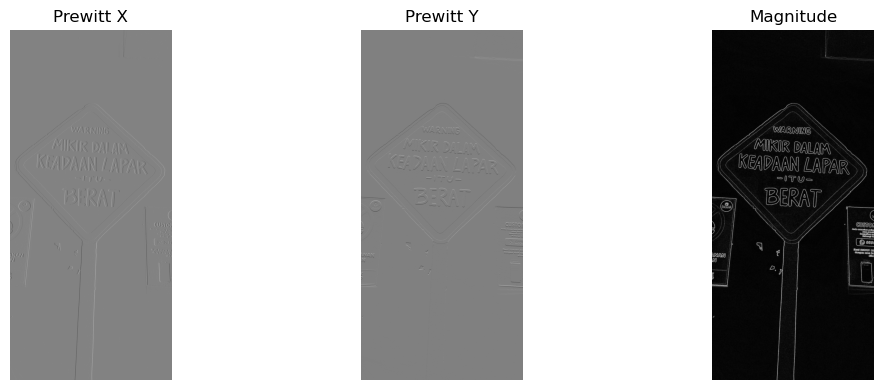

In [37]:
# 7. Visualisasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Prewitt X")
plt.imshow(prewitt_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Prewitt Y")
plt.imshow(prewitt_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()